<a href="https://colab.research.google.com/github/Dagnne/TalentoTechDag/blob/main/Taller_preguntas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?


#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")


In [16]:
# Importar librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
ruta = '/content/drive/MyDrive/Analisis de Datos basico Talento Tech/dataset_banco.csv'
data = pd.read_csv(ruta) # La "ruta" se puede definir como ruta o path y los parentesis () no influyen para correr el codigo

# Taller preguntas

1. ¿Cual es la edad promedio de los clientes interesados en adquirir un certificado de deposito?

2. En una grafica, establece la diferencia de ingresos entre clientes interesados y no interesados en el certificado de deposito

3. En un grafico de barras, establece la distribucion de genero entre cliente interesados en el certificado de deposito

4. ¿Cual es el nivel educativo predominante entre clientes interesados en el certificado de deposito?

5. ¿Cual es la relacion entre estado civil vs el interes en adquirir el certificado de deposito?

6. ¿Cual es la distribucion del medio de contacto mas frecuente de los clientes interesados en adquirirel certificado de deposito?

7. En un grafico de barras horizontales, responde, ¿Cual es el tipo de ocupacion de los clientes interesados en adquirir el certificado de deposito?

8. ¿Cual es la frecuencia de contacto con los clientes interesados antes de la conversion?

9. Cual es el patron temporal en los contactos que conducen a una mayor conversion de clientes?

In [19]:
# 1. Edad promedio de clientes interesados
edad_prom = data[data['y'] == 'yes']['age'].mean()
print("Edad promedio de clientes interesados:", edad_prom)

Edad promedio de clientes interesados: 41.80434782608695


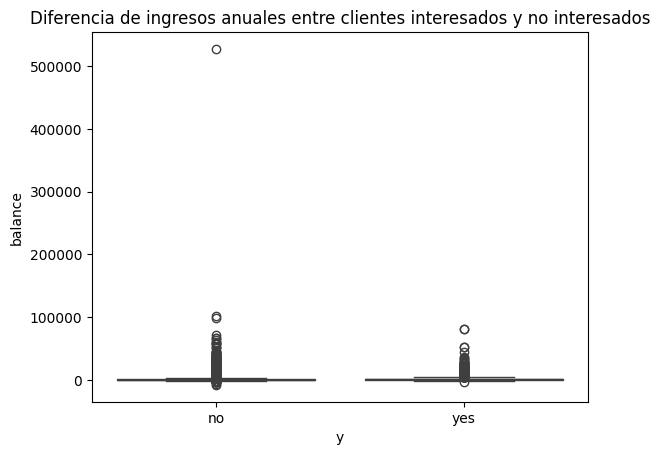

In [20]:
# 2. Diferencia de ingresos entre clientes interesados y no interesados
sns.boxplot(x='y', y='balance', data=data)
plt.title('Diferencia de ingresos anuales entre clientes interesados y no interesados')
plt.show()

In [21]:
# 3. Distribucion de genero entre clientes interesados en el certificado de deposito

#count = data['y'].value_counts()
#print('cantidad de interesados y no interesados', count)
#plt.hist(data['y'])
#plt.show()

# Filter data for customers interested in the certificate of deposit
#dist_genero = data[data['y'] == 'yes']

# Print the first few rows of the filtered DataFrame
#dist_genero.head()

count = data[data['y']== 'yes'].value_counts()
print(count)


# ¡EL CAMPO DE GENERO NO EXISTE EN EL DATAFRAME!, POR LO TANTO NO SE PUEDE REALIZAR UNA REALCION ENTRE LAS DOS VARIABLES

age  job           marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays   previous  poutcome  y  
52   technician    divorced  secondary  no        1005.0  yes      no    cellular   2    jun    195.0     1         -1.0    0         unknown   yes    2
18   student       single    primary    no        608.0   no       no    cellular   12   aug    267.0     1         -1.0    0         unknown   yes    1
46   blue-collar   married   secondary  no        1568.0  yes      no    cellular   2    jun    310.0     1          55.0   6         other     yes    1
     entrepreneur  divorced  secondary  no       -563.0   no       yes   cellular   15   jul    769.0     4         -1.0    0         unknown   yes    1
     blue-collar   single    tertiary   no        460.0   yes      no    unknown    7    may    1102.0    2         -1.0    0         unknown   yes    1
                                                                                       

In [38]:
# education: unificar sec. y secondary, unk y unknown

print(data['education'].unique())
data['education'] = data['education'].str.replace('sec.','secondary', regex=False)
data.loc[data['education']=='unk','education'] = 'unknown'
data.loc[data['education']=='primary','education'] = 'Primary'
print(data['education'].unique())

['tertiary' 'secondary' 'unknown' 'Primary' 'SECONDARY' 'Secondary'
 'Tertiary' 'UNK' nan]
['tertiary' 'secondary' 'unknown' 'Primary' 'SECONDARY' 'Secondary'
 'Tertiary' 'UNK' nan]


Nivel educativo predominante en interesados


<BarContainer object of 4 artists>

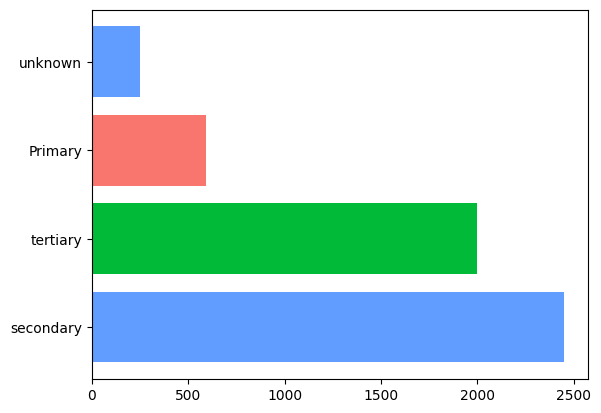

In [39]:
# 4. Nivel educativo predominante en interesados

print('Nivel educativo predominante en interesados')

import matplotlib.pyplot as plt

# Datos
y = data[data['y']=='yes']['education'].value_counts()
x = y.index.to_list()
y = y.to_list()
colores = ["#619cff", "#00ba38", "#f8766d"] # Se puede hacer personalizacion del color

# Gráfico de barras
fig, ax = plt.subplots()
ax.barh(x, width = y, color=colores)

In [40]:
# Eliminar filas con "age">100

print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data.drop(data[data['age'] > 100].index)
print(f'Tamaño del set despues de eliminar registros de edad:{data.shape}')

Tamaño del set antes de eliminar registros de edad: (45207, 17)
Tamaño del set despues de eliminar registros de edad:(45207, 17)


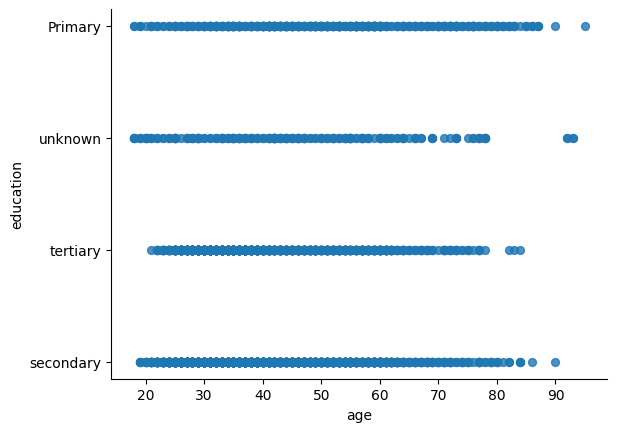

In [41]:

# Esta grafica nos muestra la edad y nivel de educacion del los clientes interesados en el certificado de deposito
yes_data = data[data['y'] == 'yes'] # esta linea de codigo es la que define el subnivel
# de la categoria que se quiere visualizar especificamente, vs otras categorias
yes_data.plot(kind='scatter', x='age', y='education', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


Relacion entre estado civil e interesados


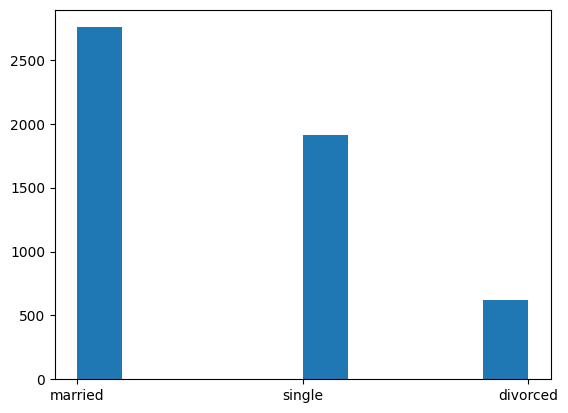

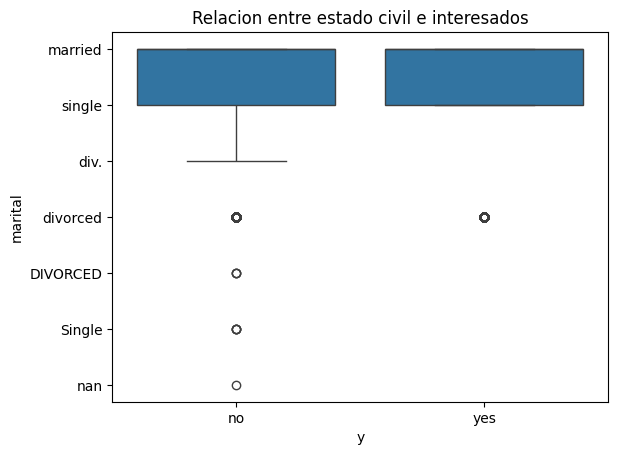

In [24]:
# 5. Relacion entre estado civil e interesados

print('Relacion entre estado civil e interesados')

data['marital'] = data['marital'].astype('str') # se debe convertir el tipo de datos (astype) de marital a string,
# para que el histograma se ejecute correctamente
plt.hist(data[data['y']=='yes']['marital'])
plt.show()

sns.boxplot(x='y', y='marital', data=data)
plt.title('Relacion entre estado civil e interesados')
plt.show()


Distribucion contacto mas frecuente de interesados


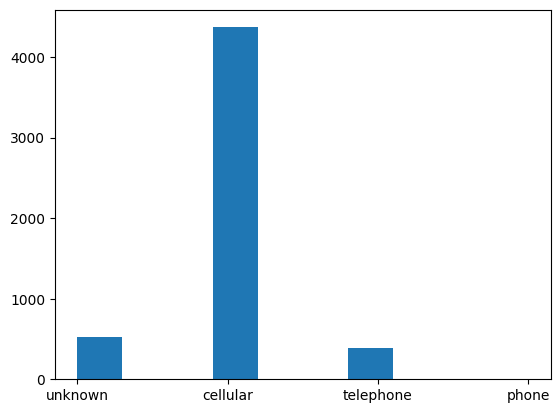

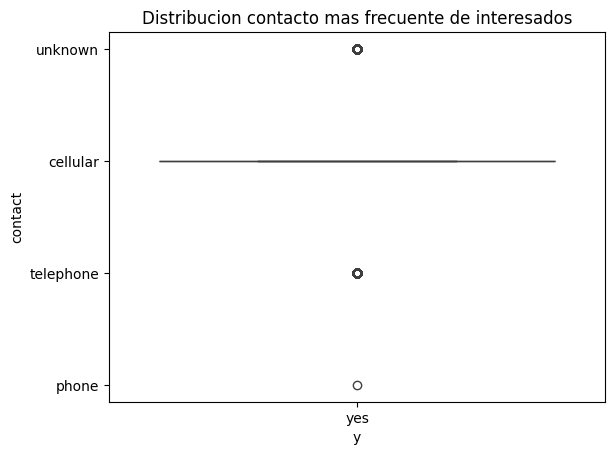

In [25]:
# 6. Distribucion contacto mas frecuente de interesados

# PORQUE SOLAMENTE APARECE LA INICIAL DE LA CATEGORIA EN EL EJE CONTACTO

print('Distribucion contacto mas frecuente de interesados')

data['contact'] = data['contact'].astype('str')
plt.hist(data[data['y']=='yes']['contact'])
plt.show()


sns.boxplot(x='y', y='contact', data=yes_data)
plt.title('Distribucion contacto mas frecuente de interesados')
plt.show()


<BarContainer object of 12 artists>

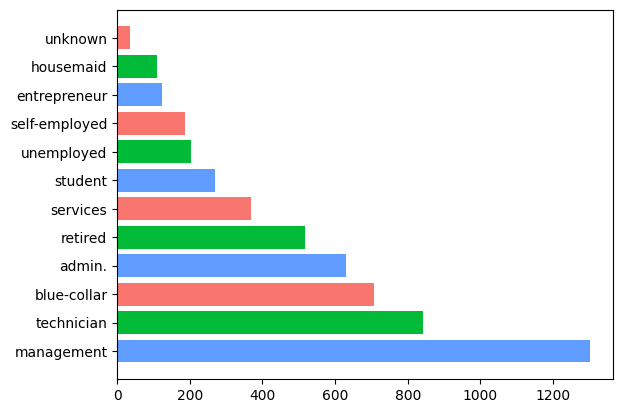

In [26]:
# 7. Ocupacion de clientes interesados

import matplotlib.pyplot as plt

# Datos
y = data[data['y']=='yes']['job'].value_counts()
x = y.index.to_list()
y = y.to_list()
colores = ["#619cff", "#00ba38", "#f8766d"]

# Gráfico de barras
fig, ax = plt.subplots()
ax.barh(x, width = y, color=colores)



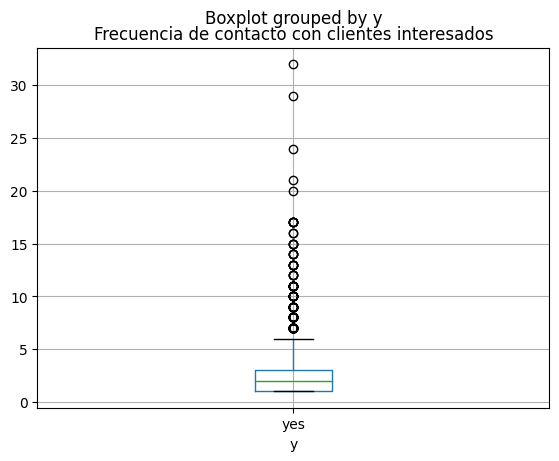

In [27]:
# 8. Frecuencia de contacto con clientes interesados (CAMPAIGN)

yes_data.boxplot(column='campaign', by='y')
plt.title('Frecuencia de contacto con clientes interesados')
plt.show()


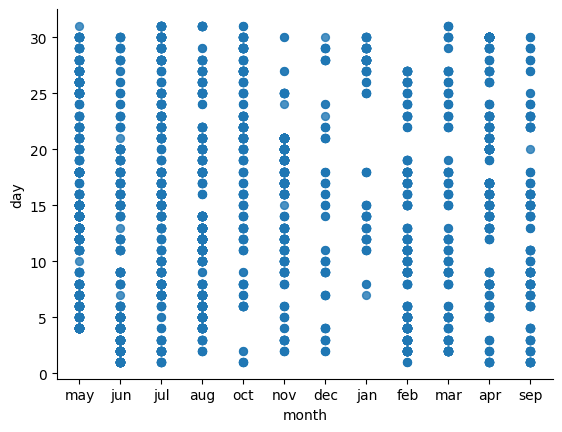

In [28]:
# 9. Patron temporal en contacto con mayos conversion de clientes
yes_data.plot(kind='scatter', x='month', y='day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
